In [55]:
# Alumna: Romero Jiménez Sofía Cristal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math

In [56]:
# Parámetro de la distribución Poisson
lambda_poisson = 5
n = 100
U = np.random.uniform(0, 1, n)

def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / math.factorial(k)
    return k

demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]
print("Demanda diaria simulada:", demanda_simulada)

Demanda diaria simulada: [2, 7, 3, 8, 8, 9, 2, 4, 1, 2, 2, 7, 3, 4, 7, 5, 5, 1, 11, 7, 2, 3, 5, 3, 10, 4, 6, 3, 9, 4, 4, 6, 6, 8, 3, 4, 5, 7, 5, 4, 5, 3, 5, 5, 0, 6, 4, 5, 2, 5, 7, 4, 2, 4, 3, 4, 5, 6, 7, 4, 4, 4, 6, 5, 3, 3, 8, 4, 6, 3, 3, 4, 4, 6, 4, 8, 7, 4, 8, 2, 4, 4, 6, 7, 5, 7, 7, 6, 8, 2, 5, 5, 11, 7, 5, 5, 2, 2, 4, 7]


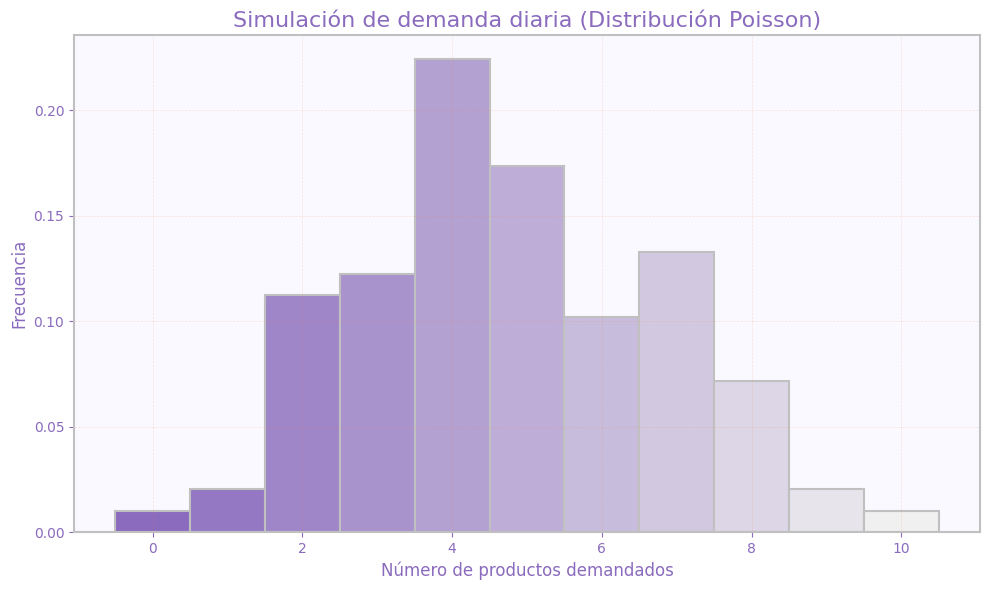

In [57]:
# Diseño de la gráfica
plt.figure(figsize=(10, 6))


lila = '#8A6BBE'
blanco = '#F0F0F0'
naranja = '#FF7D49'
plateado = '#C0C0C0'

# Colormap personalizado
colors = [lila, blanco]
cmap = LinearSegmentedColormap.from_list("custom_lilac", colors, N=100)

# Histograma
n, bins, patches = plt.hist(demanda_simulada,
                           bins=np.arange(0, max(demanda_simulada) + 1) - 0.5,
                           edgecolor=plateado,
                           linewidth=1.5,
                           density=True)

# Barras con degradado
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))


plt.title("Simulación de demanda diaria (Distribución Poisson)", fontsize=16, color=lila)
plt.xlabel("Número de productos demandados", fontsize=12, color=lila)
plt.ylabel("Frecuencia", fontsize=12, color=lila)

# Ejes
plt.tick_params(colors=lila)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(plateado)
    spine.set_linewidth(1.5)

# Cuadricula
plt.grid(True, linestyle='--', linewidth=0.5, color=naranja, alpha=0.2)

# Fondo
plt.gca().set_facecolor('#F9F9FF')

plt.tight_layout()
plt.show()